In [2]:
#!pip install xgboost

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('Tesla.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [8]:
df.shape

(1692, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [12]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


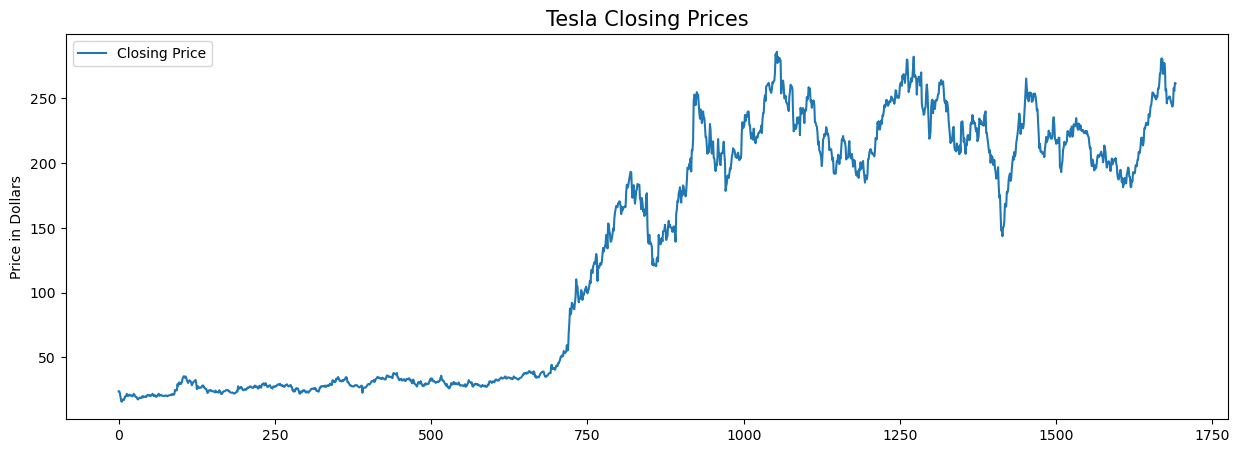

In [14]:
# Visualizing Tesla's Closing Price
plt.figure(figsize=(15, 5))
plt.plot(df['Close'], label='Closing Price')
plt.title('Tesla Closing Prices', fontsize=15)
plt.ylabel('Price in Dollars')
plt.legend()
plt.show()

In [16]:
df[df['Close'] == df['Adj Close']].shape

(1692, 7)

In [18]:
df = df.drop(['Adj Close'], axis=1)

In [20]:
df.head()

,Date,Open,High,Low,Close,Volume
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900


In [22]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

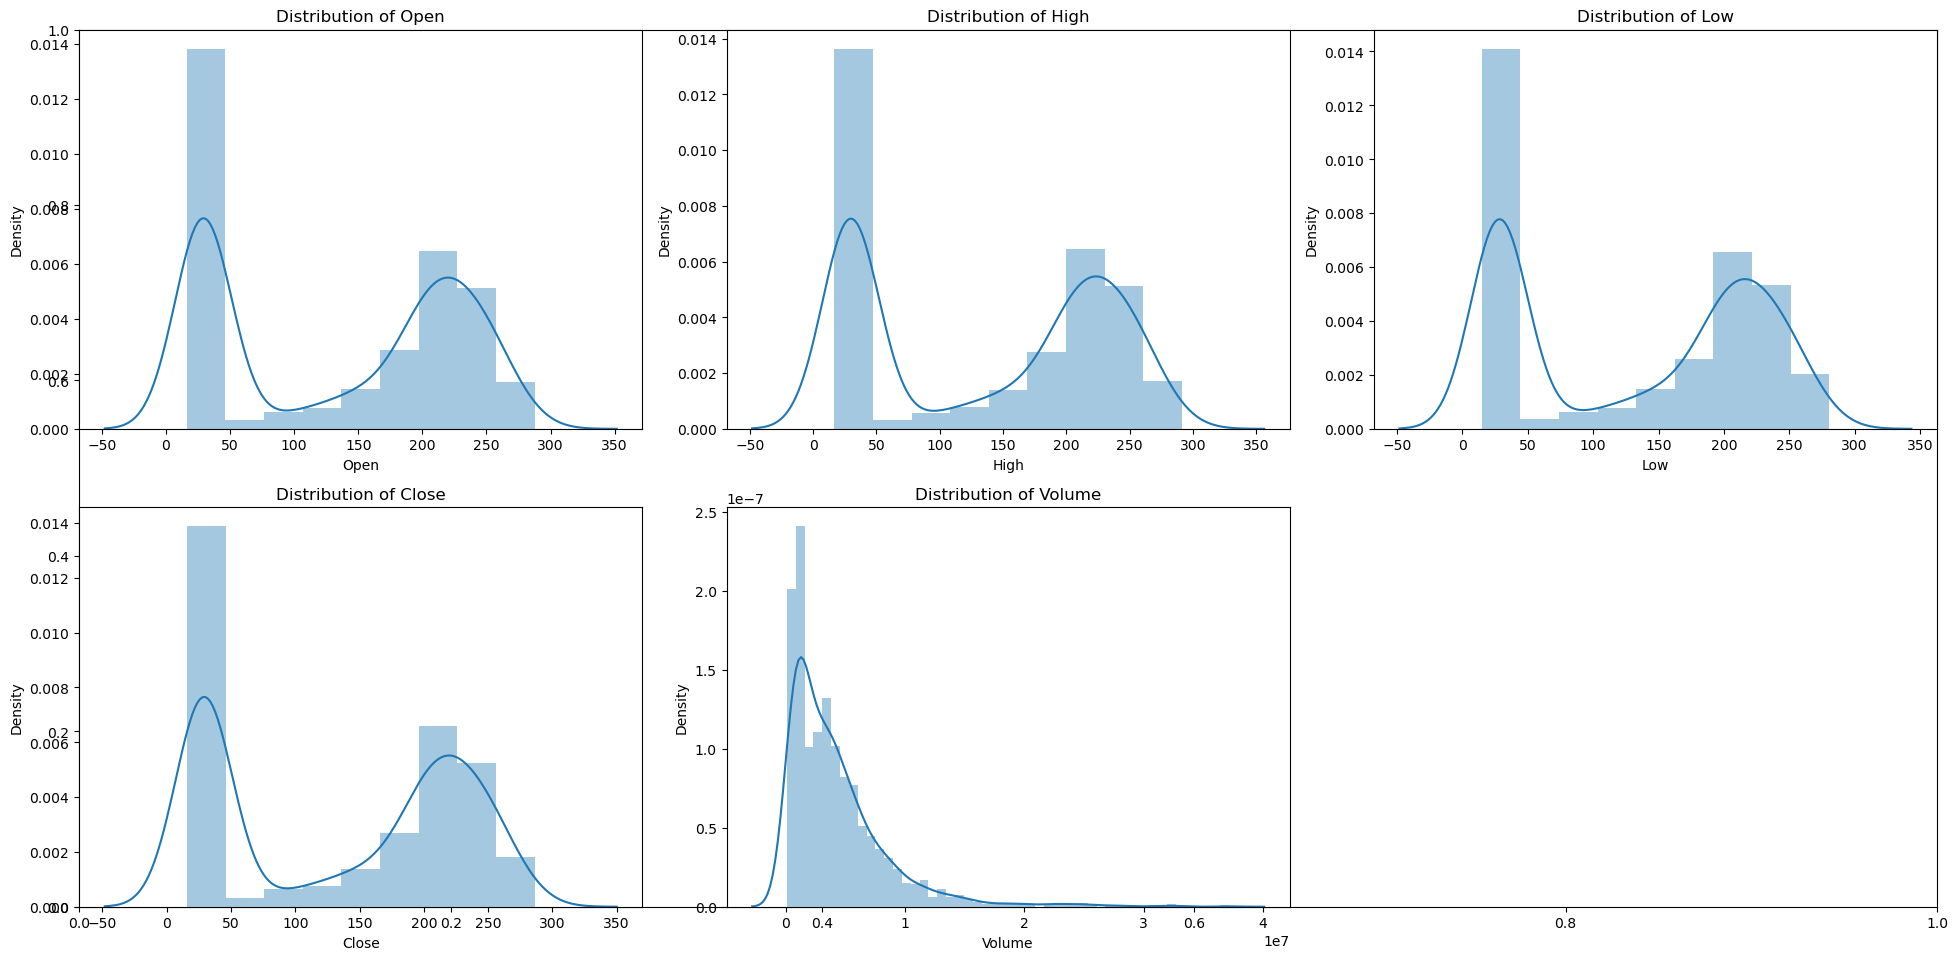

In [24]:
# Feature Distributions
features = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sb.distplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

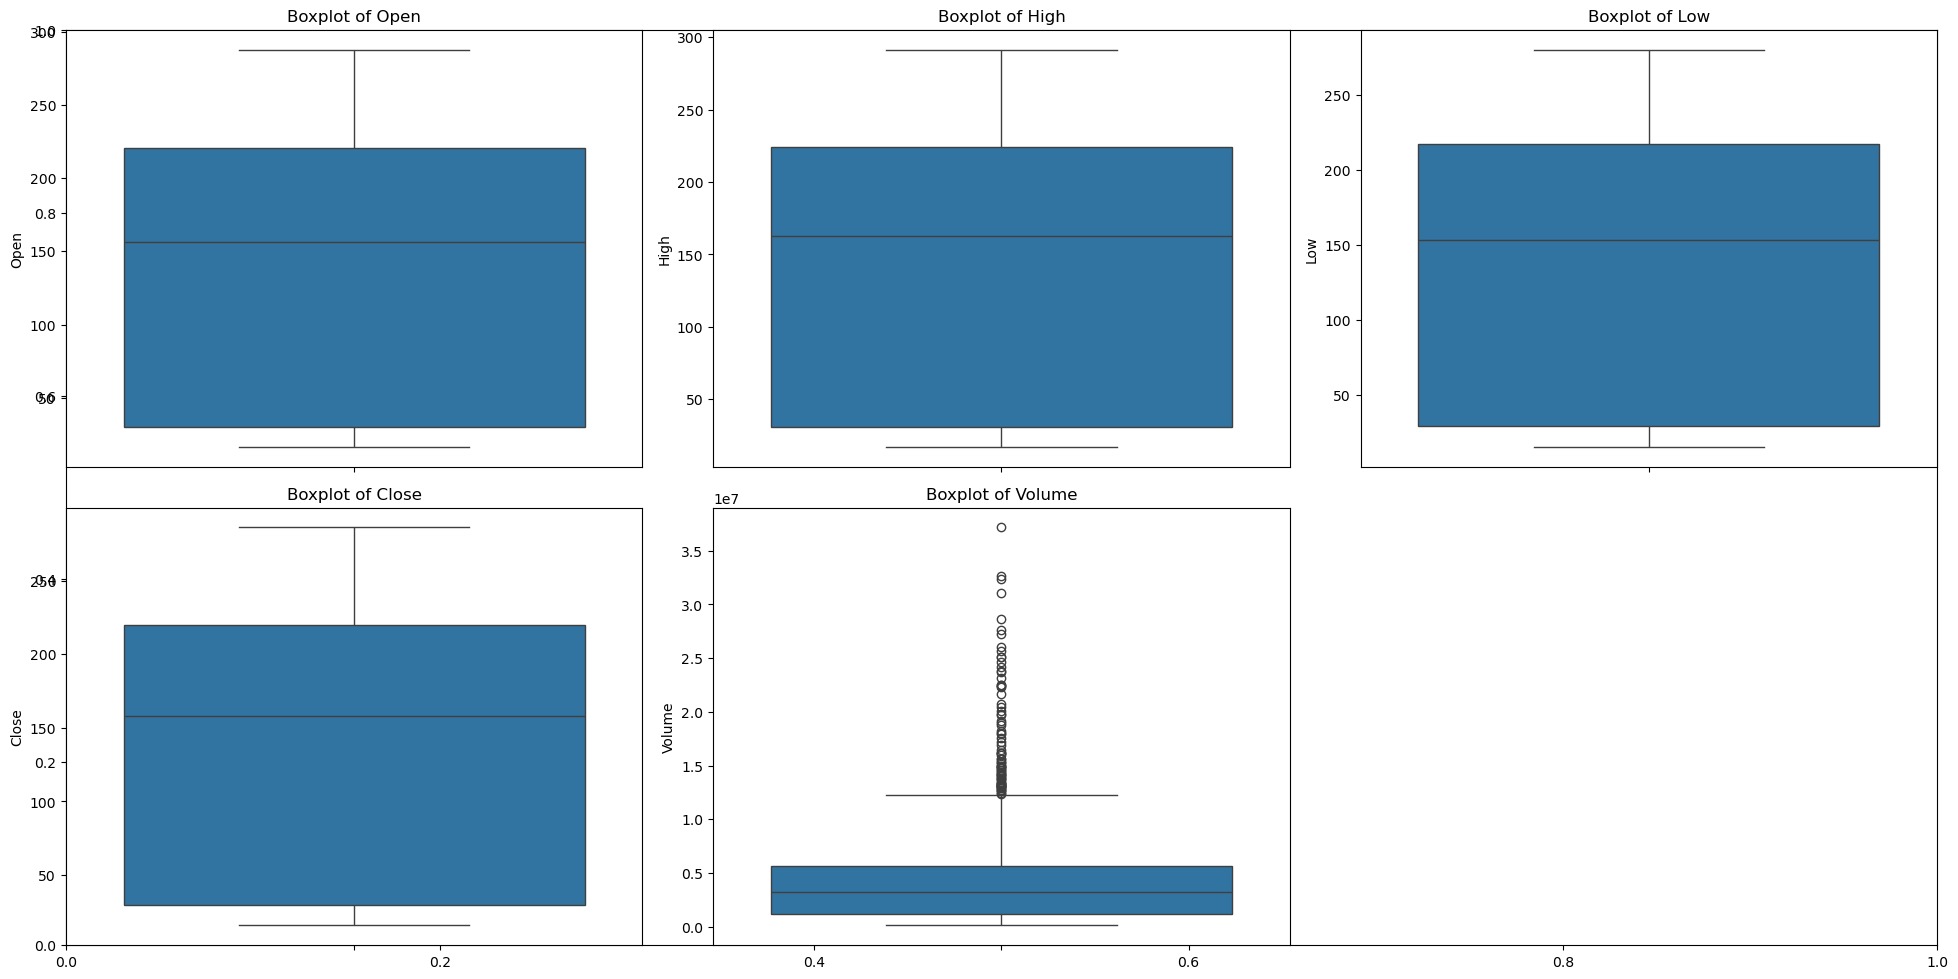

In [26]:
# Boxplots for Outlier Detection
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sb.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [28]:
# Extracting Date Components
df[['month', 'day', 'year']] = df['Date'].str.split('/', expand=True).astype(int)
df['is_quarter_end'] = np.where(df['month'] % 3 == 0, 1, 0)
df = df.drop(['Date'], axis=1)

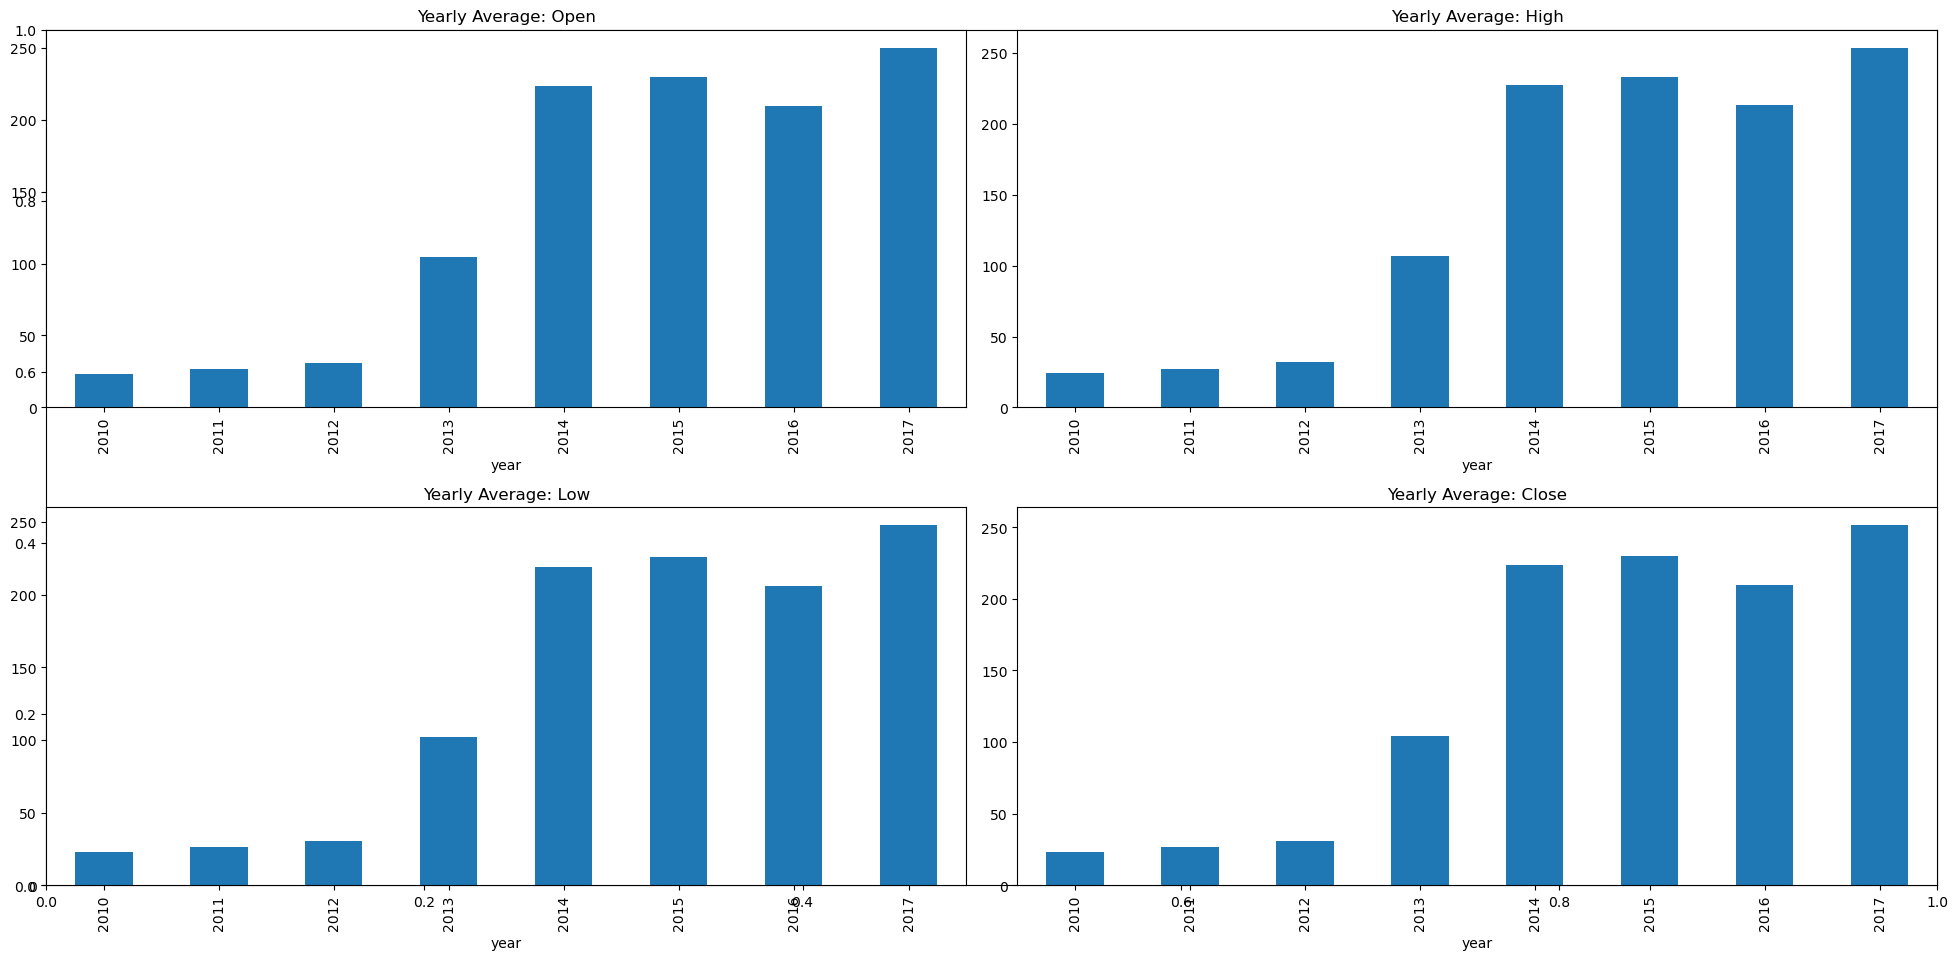

In [30]:
# Grouped Bar Plot by Year
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20, 10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    data_grouped[col].plot.bar()
    plt.title(f'Yearly Average: {col}')
plt.tight_layout()
plt.show()

In [32]:
# Feature Engineering
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

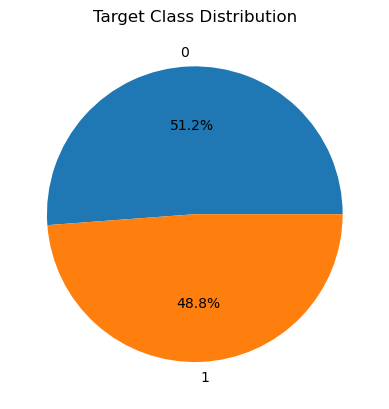

In [34]:
# Pie Chart of Target Distribution
plt.pie(df['target'].value_counts(), labels=[0, 1], autopct='%1.1f%%')
plt.title('Target Class Distribution')
plt.show()

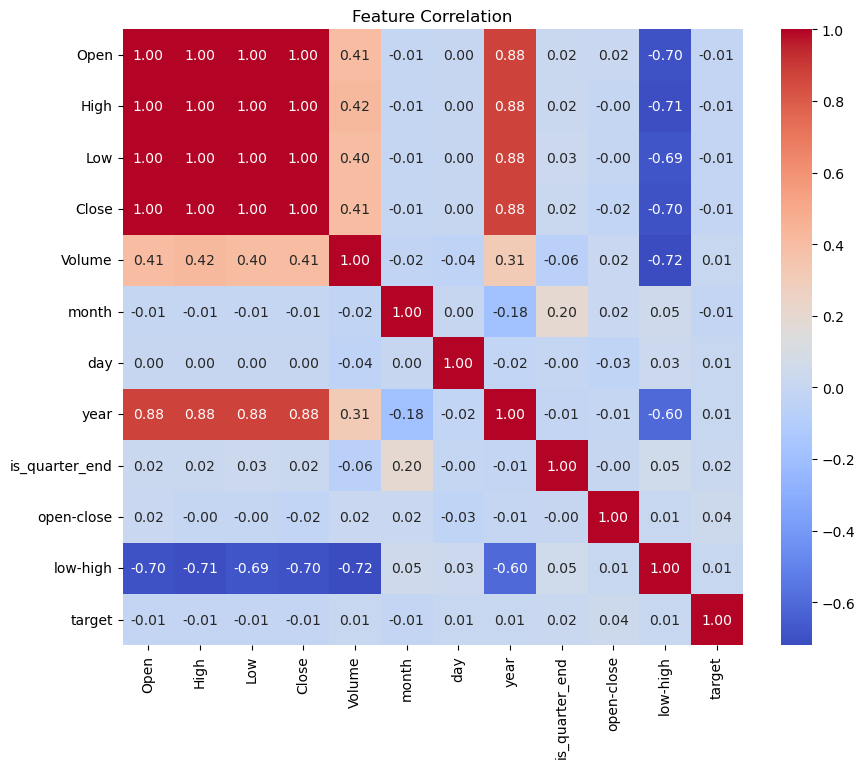

In [36]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [38]:
# Selecting Features and Target
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

# Scaling Features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Splitting the Data
X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.1, random_state=2022)
print(f"Training Shape: {X_train.shape}, Validation Shape: {X_valid.shape}")

Training Shape: (1522, 3), Validation Shape: (170, 3)


In [40]:
# Initializing and Training Models
models = [
    LogisticRegression(),
    SVC(kernel='poly', probability=True),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss')
]

for model in models:
    model.fit(X_train, Y_train)
    train_acc = metrics.roc_auc_score(Y_train, model.predict_proba(X_train)[:, 1])
    val_acc = metrics.roc_auc_score(Y_valid, model.predict_proba(X_valid)[:, 1])
    print(f"{model.__class__.__name__}:\n Training AUC: {train_acc:.4f}\n Validation AUC: {val_acc:.4f}\n")

LogisticRegression:
 Training AUC: 0.5192
 Validation AUC: 0.5437

SVC:
 Training AUC: 0.4721
 Validation AUC: 0.4459

XGBClassifier:
 Training AUC: 0.9645
 Validation AUC: 0.5730



In [41]:
# Confusion Matrix for Logistic Regression
# We won't select XGB as it's pruned to overfitting i.e, high (Tr-Val)
ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

NameError: name 'ConfusionMatrixDisplay' is not defined